# 4. Image Convolution

# Team # 15

* Manuel Alemán Cueto A01794894
* Emmanuel Domínguez Bravo A01793683
* Alfonso Garibay Flores A01224167
* Zmaltzin Paola Godinez Juárez A01794538
* Luis Angel Hermenegildo Dominguez A01793625

## Table of Contents
1. [Libraries](#libraries)
2. [Simple Example](#simple)
3. [PyTorch Convolution](#pytorch)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [1]:
!git clone https://github.com/Alfonso-Garibay/computer-vision-course-Equipo-15.git

Cloning into 'computer-vision-course-Equipo-15'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 141 (delta 24), reused 26 (delta 12), pack-reused 92
Receiving objects: 100% (141/141), 49.60 MiB | 39.81 MiB/s, done.
Resolving deltas: 100% (59/59), done.


## Simple Convolution <a class="anchor" id="simple" ></a>

### Definition

- __I__: Image to convolve.
- __H__: filter matrix to convolve the image with.
- __J__: Result of the convolution.

The following graphics shows exemplary the mathematical operations of the convolution. The filter matrix __H__ is shifted over the input image __I__. The values 'under' the filter matrix are multiplicated with the corresponding values in __H__, summed up and writen to the result __J__. The target position is usually the position under the center of __H__.

<img src="https://github.com/Alfonso-Garibay/computer-vision-course-Equipo-15/blob/main/data/convolution.png?raw=1" width="70%">

In order to implement the convolution with a block filter, we need two methods. The first one will create the block filter matrix __H__ depending on the filter width/height __n__.

A block filter holds the value $\dfrac{1}{n\cdot n}$ at each position:

In [ ]:
def block_filter(n):
    H = np.ones((n, n)) / (n * n) # each element in H has the value 1/(n*n)
    return H

We will test the method by creating a filter with ``n = 5``:

In [ ]:
H = block_filter(5)
print(H)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Next, we define the actual convolution operation. To prevent invalid indices at the border of the image, we introduce the padding __p__.

In [ ]:
def apply_filter(I, H):
    h, w = I.shape                         # image dimensions (height, width)
    n = H.shape[0]                         # filter size
    p = n // 2                             # padding size
    J = np.zeros_like(I)                   # output image, initialized with zeros

    for x in range(p, h-p):
        for y in range(p, w-p):
            J[x, y] = np.sum(I[x-p:x+n-p, y-p:y+n-p] * H)
    return J

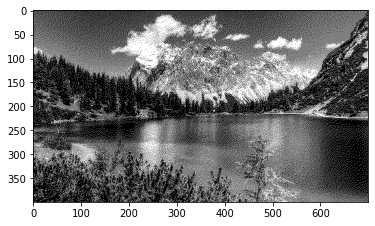

In [ ]:
image = Image.open('data/image.jpg')
image = image.convert('1') # convert image to black and white

image = np.array(image)

# image = np.zeros((200, 200), dtype=np.float)
# for x in range(200):
#     for y in range(200):
#         d = ((x-100)**2+(y-100)**2)**0.5
#         image[x, y] = d % 8 < 4

plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()

In [ ]:
image = image.astype(float)

Next we test our implementation and apply a block filter with size 7

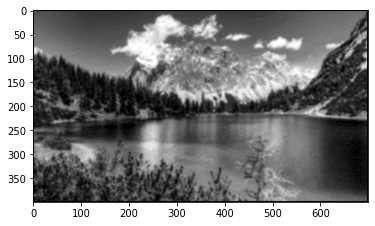

In [ ]:
n = 5
H = block_filter(n)
J = apply_filter(image, H)

plt.imshow(J, cmap='gray')
plt.show()

## PyTorch Convolution <a class="anchor" id="pytorch" ></a>

In [ ]:
from PIL import Image

img = Image.open('data/image.jpg')
img.thumbnail((256,256), Image.ANTIALIAS) # Resize to half to reduce the size of this notebook.

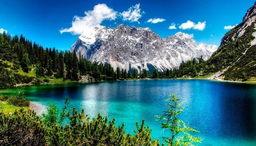

In [ ]:
img

In [ ]:
import torch, torchvision
from torchvision import transforms
from torch import nn

In [ ]:
to_tensor = transforms.Compose([
   transforms.Grayscale(),  # Convert image to grayscale.
   transforms.ToTensor()    # Converts a PIL Image in the range [0, 255] to a torch.FloatTensor in the range [0.0, 1.0].
])

to_pil = transforms.Compose([
    transforms.ToPILImage()
])

In [ ]:
input = to_tensor(img)
input.shape


torch.Size([1, 146, 256])

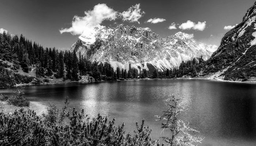

In [ ]:
to_pil(input)

2D convolution over an input image:

+ `in_channels = 1`: an input is a grayscale image
+ `out_channels = 1`: an output is a grayscale image
+ `kernel_size = (3, 3)`: the kernel (filter) size is 3 x 3
+ `stride = 1`: the stride for the cross-correlation is 1
+ `padding = 1`: zero-paddings on both sides for 1 point for each dimension
+ `bias = False`: no bias parameter (for simplicity)

In [ ]:
conv = nn.Conv2d(1, 1, (3, 3), stride=1, padding=1, bias=False)

In [ ]:
# The code below does not work because the convolution layer requires the dimension for batch.
conv(input)

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [1, 1, 3, 3], but got 3-dimensional input of size [1, 146, 256] instead

We need to insert a dimension for a batch at dim=0.

In [ ]:
input = input.unsqueeze(0)
input.shape

torch.Size([1, 1, 146, 256])

In [ ]:
output = conv(input)
output.shape

torch.Size([1, 1, 146, 256])

Setting `padding=1` in the convolution layer, we obtain an image of the same size.

In [ ]:
output.shape

torch.Size([1, 1, 146, 256])

We need to remove the first dimension before converting to a PIL object.

In [ ]:
output.data.squeeze(dim=0).shape

torch.Size([1, 146, 256])

Display the output from the convolution layer by converting `output` to a PIL object.

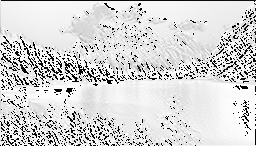

In [ ]:
to_pil(output.data.squeeze(dim=0))

Clip every value in the output tensor within the range of [0, 1].

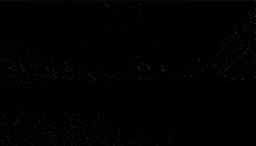

In [ ]:
to_pil(torch.clamp(output, 0, 1).data.squeeze(dim=0))

In [ ]:
def display(img1, img2):
    im1 = to_pil(torch.clamp(img1, 0, 1).data.squeeze(dim=0))
    im2 = to_pil(torch.clamp(img2, 0, 1).data.squeeze(dim=0))
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

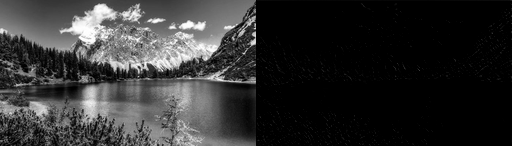

In [ ]:
display(input, output)

### Identity

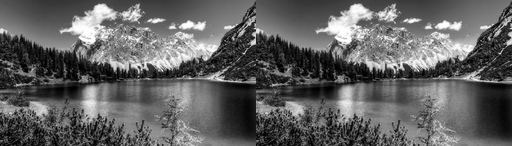

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1, 0.],
    [0., 0., 0.],
]]])

output = conv(input)
display(input, output)

### Brighten

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 1.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


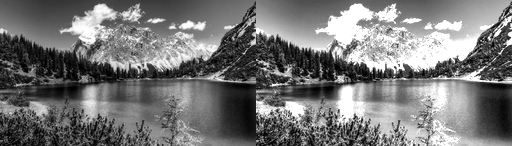

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Darken

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


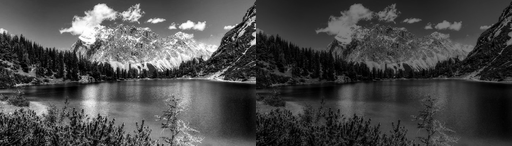

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 0.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Box blur

tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]])


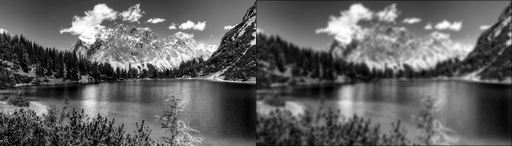

In [ ]:
conv.weight.data = torch.ones((1, 1, 3,3), dtype=torch.float) / 9.
print(conv.weight.data)
output = conv(input)
display(input, output)

### Gaussian blur

tensor([[[[0.0625, 0.1250, 0.0625],
          [0.1250, 0.2500, 0.1250],
          [0.0625, 0.1250, 0.0625]]]])


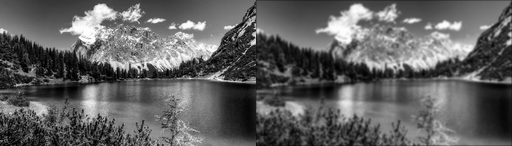

In [ ]:
conv.weight.data = torch.tensor([[[
    [1., 2., 1.],
    [2., 4., 2.],
    [1., 2., 1.],
]]])/16.
print(conv.weight.data)
output = conv(input)
display(input, output)

### Sharpen

tensor([[[[ 0., -1.,  0.],
          [-1.,  5., -1.],
          [ 0., -1.,  0.]]]])


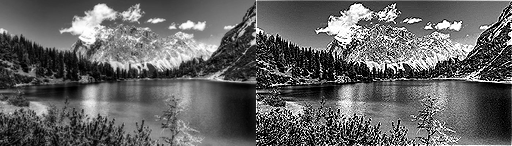

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., -1., 0.],
    [-1., 5., -1.],
    [0., -1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

tensor([[[[ 0., -2.,  0.],
          [-2., 10., -2.],
          [ 0., -2.,  0.]]]])


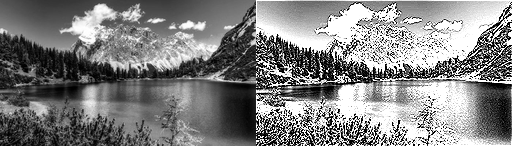

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., -2., 0.],
    [-2., 10., -2.],
    [0., -2., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Edge detection

tensor([[[[ 0.,  1.,  0.],
          [ 1., -4.,  1.],
          [ 0.,  1.,  0.]]]])


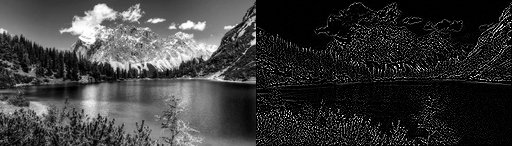

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., 1., 0.],
    [1., -4., 1.],
    [0., 1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

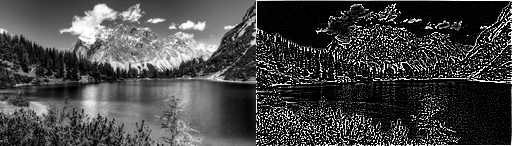

In [ ]:
conv.weight.data = torch.tensor([[[
    [-1., -1., -1.],
    [-1., 8., -1.],
    [-1., -1., -1.],
]]])
output = conv(input)
display(input, output)

## **Ejercicios**

**1.- Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?**

**1.1 El operador Prewitt** El operador Prewitt se utiliza en el procesamiento de imágenes, particularmente dentro de los algoritmos de detección de bordes. Técnicamente, es un operador de diferenciación discreto, que calcula una aproximación del gradiente de la función de intensidad de la imagen. En cada punto de la imagen, el resultado del operador Prewitt es el vector de gradiente correspondiente o la norma de este vector. El operador Prewitt se basa en la convolución de la imagen con un filtro pequeño, separable y de valor entero en direcciones horizontal y vertical y, por lo tanto, es relativamente barato en términos de cálculos

La complejidad del algoritmo prewitt es O(nmk^2), donde:

* n y m son las dimensiones de la imagen (altura y anchura respectivamente).
* k es el tamaño del kernel.
Esto se debe a que para cada píxel de la imagen (n*m), el algoritmo realiza una operación de convolución con el kernel (k^2). Por lo tanto, la complejidad total es proporcional al número de píxeles en la imagen multiplicado por el tamaño del kernel al cuadrado.

In [ ]:
import cv2
import numpy as np

def prewitt_filter(img, kernel_size=3):
    # Obtenemos las dimensiones de la imagen
    H, W = img.shape

    # Calculamos el padding necesario para la convolución
    pad = kernel_size // 2
    # Creamos una imagen de salida con el padding añadido y copiamos la imagen original en el centro
    out = np.zeros((H + pad*2, W + pad*2), dtype=float)
    out[pad:pad+H, pad:pad+W] = img.copy().astype(float)
    tmp = out.copy()

    # Creamos dos copias de la imagen para aplicar los filtros de Prewitt vertical y horizontal
    out_v = out.copy()
    out_h = out.copy()

    # Definimos los kernels de Prewitt vertical y horizontal
    Kv = [[1., 1., 1.], [0., 0., 0.], [-1., -1., -1.]]
    Kh = [[-1., 0., 1.], [-1., 0., 1.], [-1., 0., 1.]]

    # Aplicamos los filtros de Prewitt a cada pixel de la imagen
    for y in range(H):
        for x in range(W):
            out_v[pad+y, pad+x] = np.sum(Kv * (tmp[y:y+kernel_size, x:x+kernel_size]))
            out_h[pad+y, pad+x] = np.sum(Kh * (tmp[y:y+kernel_size, x:x+kernel_size]))

    # Nos aseguramos de que los valores de los pixeles estén en el rango [0, 255]
    out_v = np.clip(out_v, 0, 255)
    out_h = np.clip(out_h, 0, 255)

    # Eliminamos el padding y convertimos los valores de los pixeles a enteros de 8 bits
    out_v = out_v[pad:pad+H, pad:pad+W].astype(np.uint8)
    out_h = out_h[pad:pad+H, pad:pad+W].astype(np.uint8)

    # Devolvemos las imágenes filtradas
    return out_v, out_h

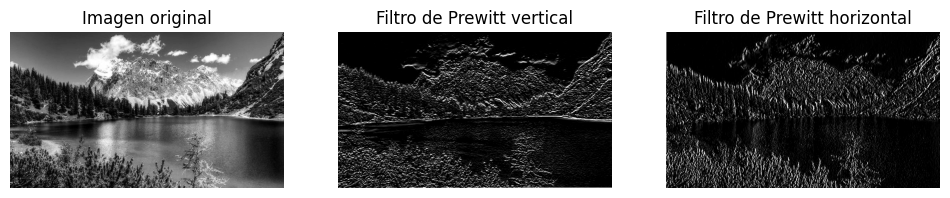

In [ ]:
import matplotlib.pyplot as plt

# Cargamos la imagen original
img = cv2.imread('data/image.jpg', 0).astype(float)

# Aplicamos el filtro de Prewitt
out_vertical, out_horizontal = prewitt_filter(img, kernel_size=3)

# Creamos una figura para mostrar los resultados
plt.figure(figsize=(12, 6))

# Mostramos la imagen original
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

# Mostramos la imagen filtrada verticalmente
plt.subplot(1, 3, 2)
plt.imshow(out_vertical, cmap='gray')
plt.title('Filtro de Prewitt vertical')
plt.axis('off')

# Mostramos la imagen filtrada horizontalmente
plt.subplot(1, 3, 3)
plt.imshow(out_horizontal, cmap='gray')
plt.title('Filtro de Prewitt horizontal')
plt.axis('off')

# Mostramos la figura
plt.show()


**1.3 El operador Laplaciano**

El laplaciano es una medida isotrópa bidimensional de la segunda derivada espacial de una imagen (Gonzalez and Woods, 2018). La cual para una función de dos variables se define de la siguiente manera:

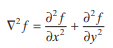

La implementación de esta ecuación se realiza mediante la convolución de los pixeles de la imagen con un kernel. Considerando que las derivadas de cualquier orden son operaciones lineales, el Laplaciano es por lo tanto una operación lineal. El resultado de aplicar el laplaciano a una imagen es la obtención de las regiones de rápido cambio de intensidad y, por lo tanto, se utiliza a menudo para la detección de bordes. Su complejidad algorítmica esta relacionada con el tamaño del kernel a medida que se incrementa y el número total de píxeles en la imagen.

In [ ]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Conjuntar las dimensiones del kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Tamaño de la convolución de salida
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Aplicar el padding a todos los lados de la imagen
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterar a traves de la imagen
    for y in range(image.shape[1]):
        # Salir de la convolución
        if y > image.shape[1] - yKernShape:
            break
        # Convolucionar si y esta por debajo del stride especificado
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Ir a la siguiente línea una vez que el kernerl esta fuera de límites
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Convolucionar solamente si x se ha movido de las especificaciones del stride
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [ ]:
# Importar imagen
def LoadImage(image):
  image = cv2.imread(image)
  original = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB)
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
  return original, image

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 188. ... 178.   0.   0.]
 ...
 [  0.   0.  16. ...  12.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 188. ... 178.   0.   0.]
 ...
 [  0.   0.  16. ...  12.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


Text(0.5, 1.0, 'Laplaciano dirección Y')

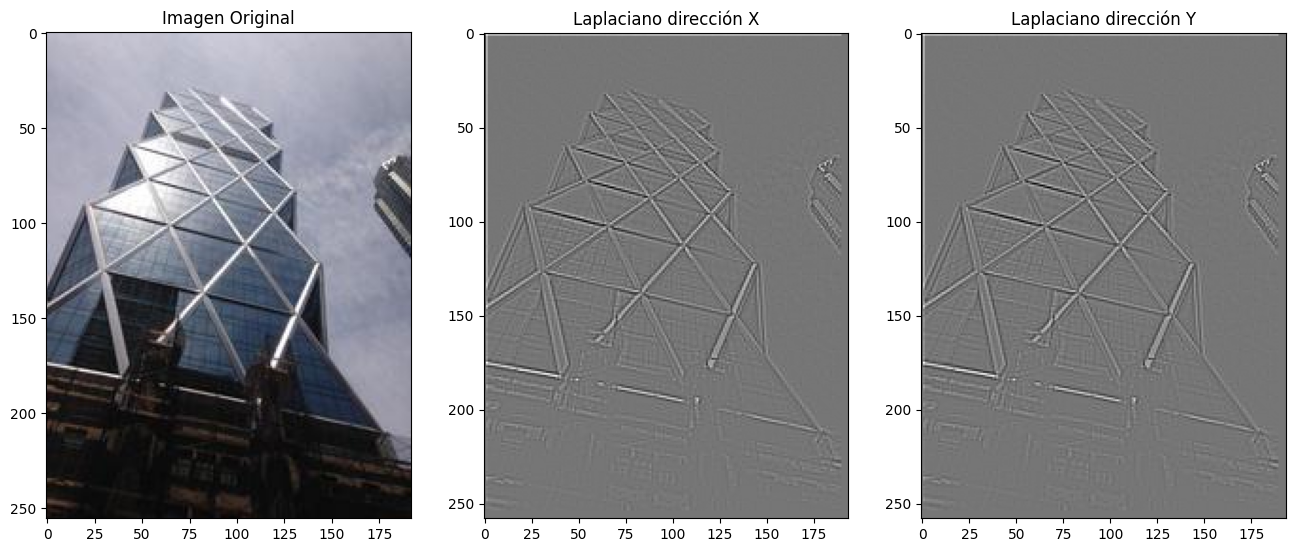

In [ ]:
# Kernel del Laplaciano en la dirección X
kernel_x = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])

# Kernel del Laplaciano en la dirección Y
kernel_y = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Importar Imagen
original, input = LoadImage('/content/data/building.jpg')

# Convolución y salida
output_x = convolve2D(input, kernel_x, padding=2)
output_y = convolve2D(input, kernel_y, padding=2)

# Mostrar las imágenes procesadas
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.imshow(original)
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(output_y, cmap='gray')
plt.title('Laplaciano dirección X')

plt.subplot(1, 3, 3)
plt.imshow(output_y, cmap='gray')
plt.title('Laplaciano dirección Y')

**1.1 Operador Sobel**

In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

# Importamos la imagen dada de dimensiones (nx, ny, nz) y transformamos a escala de grises

image_file = '/content/computer-vision-course-Equipo-15/data/image.jpg'
input_image = imread(image_file)  # Asignamos a ls variable input_image el arreglo de la imagen de entrada
[nx, ny, nz] = np.shape(input_image)  # nx: altura (renglones), ny: ancho (columnas), nz: colores (RGB)


In [4]:
# Extraemos cada uno de los componentes RGB
r_img, g_img, b_img = input_image[:, :, 0], input_image[:, :, 1], input_image[:, :, 2]

In [5]:
# Asignamos los pesos definidos para convertir la imagen a escala de grises
gamma = 1.400   # definimos el parámetro gamma de manera arbitraria para modificar
                # el brillo e influenciar en el desempeño de la detección de bordes
r_const, g_const, b_const = 0.2126, 0.7152, 0.0722  # Pesos predefinidos para los componentes RGB
grayscale_image = r_const * r_img ** gamma + g_const * g_img ** gamma + b_const * b_img ** gamma

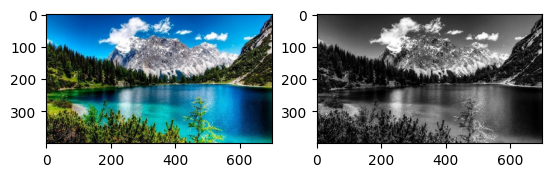

In [6]:
# Mostramos la imagen en escala de grises, así como la imagen original
fig1 = plt.figure(1)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(grayscale_image, cmap=plt.get_cmap('gray'))
fig1.show()

In [7]:
# Aplicamos el operador Sobel

"""
Estaremos utilizando los kernels Gx y Gy mostrados a continuación para obtener
el producto entre elemento por elemento con el arreglo de la imagen de entrada
en las direcciones X y Y respectivamente.
      _               _                   _                _
     |                 |                 |                  |
     | 1.0   0.0  -1.0 |                 |  1.0   2.0   1.0 |
Gx = | 2.0   0.0  -2.0 |            Gy = |  0.0   0.0   0.0 |
     | 1.0   0.0  -1.0 |                 | -1.0  -2.0  -1.0 |
     |_               _|                 |_                _|
"""

# Definimos las matrices del filtro Sobel
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(grayscale_image)  # Determinamos las dimensiones de la imagen de entrada en escala de grises
sobel_filtered_image = np.zeros(shape=(rows, columns))  # Inicializamos el arreglo de la imagen de salida con ceros

In [8]:
# Aplicamos la multiplicación de matrices con el arreglo de la imagen de entrada
# en ambas direcciones X y Y y utilizamos el output para calcular un nuevo arreglo
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))  # Dirección X
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))  # Dirección Y
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  # Calculamos la hipotenusa

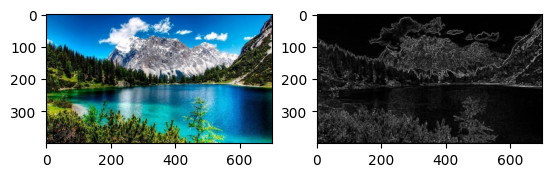

In [9]:
# Mostramos la imagen original y la imagen filtrada con el operador Sobel
fig2 = plt.figure(2)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
fig2.show()

**2.- Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.**

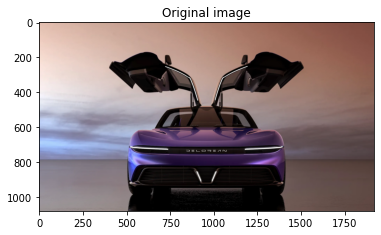

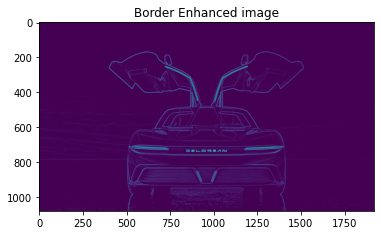

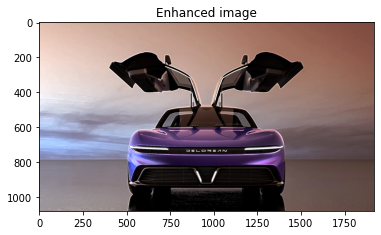

In [ ]:
#Funcion de realce de bordes usando Sobel
def border_enhanced(image):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar el operador Sobel para la detección de bordes
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Calcular la magnitud del gradiente
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Normalizar la magnitud para convertirla a valores entre 0 y 255
    gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Convertir la imagen de vuelta a tipo uint8
    gradient_magnitude = np.uint8(gradient_magnitude)

    return gradient_magnitude

def mult_mask(image, gradient_magnitude, alfa):
    # Multiplicar la imagen original por la máscara (gradientes) y el factor alfa
    enhanced_image = np.clip(image * (1 + alfa * gradient_magnitude[:, :, np.newaxis]), 0, 255).astype(np.uint8)
    return enhanced_image

# Cargar la imagen de ejemplo
original_image = cv2.imread('data/car.jpg')

# Definir un factor alfa mayor a 1 (ajustar según sea necesario)
alfa = 0.02

# Aplicar el realce de bordes
border_enhanced_image = border_enhanced(original_image)

# Aplicar el realce de bordes
enhanced_image2 = mult_mask(original_image, border_enhanced_image, alfa)

# Mostrar la imagen original y la imagen realzada
plt.imshow(original_image)
plt.title("Original image")
plt.show()
plt.imshow(border_enhanced_image)
plt.title("Border Enhanced image")
plt.show()
plt.imshow(enhanced_image2)
plt.title("Enhanced image")
plt.show()


Al utilizar la técnica de realce de bordes de SOBEL y posteriormente realizar la multiplicación por el factor Alpha se puede observar una mejora en los bordes de la imagen original. Se debe tener cuidado con el factor Alpha dado que entre más alto tiende a resaltar las líneas poco perceptibles que pueden generar ruido en la imagen.

Algunas de las principales aplicaciones para este tipo de técnicas estan:

* Mejora de imágenes médicas
* Detección de bordes en imágenes industriales
* Análisis de documentos escritos
* Mejora de imágenes satelitales o aéreas
* Mejora de imágenes artísticas
* Automoción y conducción autónoma

**3.- Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes**

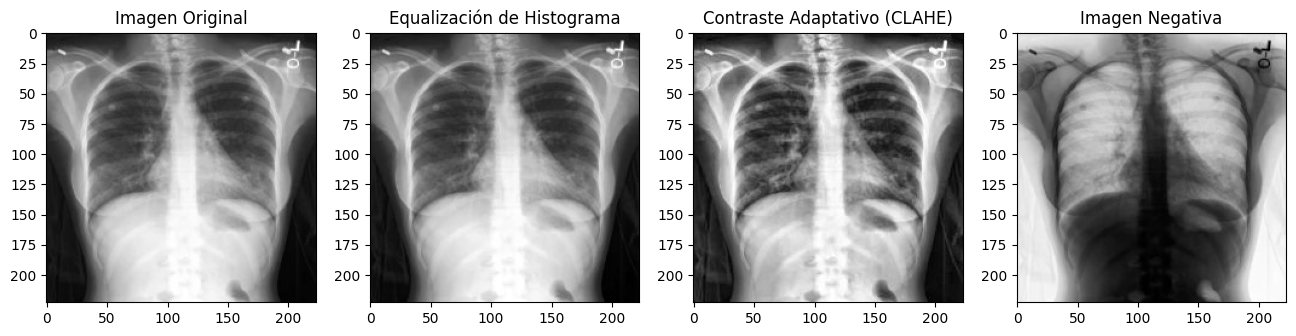

In [ ]:
# Cargar the original image
original_image = cv2.imread('/content/computer-vision-course-Equipo-15/data/chest-medical.jpg', cv2.IMREAD_GRAYSCALE)

# Equalización de histograma
equalized_image = cv2.equalizeHist(original_image)

# Aplicar ajuste de contraste adaptativo (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(original_image)

# Invertir los niveles de intensidad para obtener la imagen negativa
negative_image = 500 - original_image

# Mostrar las imágenes procesadas
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 4, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalización de Histograma')

plt.subplot(1, 4, 3)
plt.imshow(clahe_image, cmap='gray')
plt.title('Contraste Adaptativo (CLAHE)')

plt.subplot(1, 4, 4)
plt.imshow(negative_image, cmap='gray')
plt.title('Imagen Negativa')

plt.show()

La visualización de la imagen original sirve como referencia base, aunque la equalización de histograma posteriormente mejora el contraste global, redistribuyendo las intensidades de píxeles y resaltando detalles que podrían pasar desapercibidos. La implementación del contraste adaptativo (CLAHE) potencia aún más la visibilidad, ajustándose localmente a variaciones de intensidad, lo cual es crucial para estructuras específicas presentes en diferentes regiones de la radiografía. Finalmente, la creación de la imagen negativa mediante la inversión de los niveles de intensidad facilita la identificación de detalles en áreas previamente menos visibles.

**Referencias**

* Gonzalez, R. & Woods, R. (2018). Digital Image Processing.  4° Edition. Pearson.
* OpenCV, (s. f.).Sobel Derivatives consultado el 24 de enero de 2024 en https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html